In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df= pd.read_csv("nyc-rolling-sales.csv")
df.head(2)

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00


In [2]:
df.shape

(84548, 22)

In [3]:
df.columns

Index(['Unnamed: 0', 'BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'],
      dtype='object')

In [4]:
df.rename(columns = {'Unnamed: 0':'Index','NEIGHBORHOOD':'NEIGHBOURHOOD','EASE-MENT':'EASEMENT','APARTMENT NUMBER':'APPARTMENT_NUMBER'}, inplace=True)

In [5]:
df.columns = df.columns.str.strip().str.replace(' ', '_')

In [6]:
df.columns

Index(['Index', 'BOROUGH', 'NEIGHBOURHOOD', 'BUILDING_CLASS_CATEGORY',
       'TAX_CLASS_AT_PRESENT', 'BLOCK', 'LOT', 'EASEMENT',
       'BUILDING_CLASS_AT_PRESENT', 'ADDRESS', 'APPARTMENT_NUMBER', 'ZIP_CODE',
       'RESIDENTIAL_UNITS', 'COMMERCIAL_UNITS', 'TOTAL_UNITS',
       'LAND_SQUARE_FEET', 'GROSS_SQUARE_FEET', 'YEAR_BUILT',
       'TAX_CLASS_AT_TIME_OF_SALE', 'BUILDING_CLASS_AT_TIME_OF_SALE',
       'SALE_PRICE', 'SALE_DATE'],
      dtype='object')

In [7]:
columns=df.columns
df.duplicated(columns).sum()

0

In [8]:
df.describe()

,Index,BOROUGH,BLOCK,LOT,ZIP_CODE,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,TOTAL_UNITS,YEAR_BUILT,TAX_CLASS_AT_TIME_OF_SALE
count,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000
mean,10344.359878,2.998758,4237.218976,376.224015,10731.991614,2.025264,0.193559,2.249184,1789.322976,1.657485
std,7151.779436,1.289790,3568.263407,658.136814,1290.879147,16.721037,8.713183,18.972584,537.344993,0.819341
min,4.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4231.000000,2.000000,1322.750000,22.000000,10305.000000,0.000000,0.000000,1.000000,1920.000000,1.000000
50%,8942.000000,3.000000,3311.000000,50.000000,11209.000000,1.000000,0.000000,1.000000,1940.000000,2.000000
75%,15987.250000,4.000000,6281.000000,1001.000000,11357.000000,2.000000,0.000000,2.000000,1965.000000,2.000000
max,26739.000000,5.000000,16322.000000,9106.000000,11694.000000,1844.000000,2261.000000,2261.000000,2017.000000,4.000000


In [9]:
df.isnull().sum()

Index                             0
BOROUGH                           0
NEIGHBOURHOOD                     0
BUILDING_CLASS_CATEGORY           0
TAX_CLASS_AT_PRESENT              0
BLOCK                             0
LOT                               0
EASEMENT                          0
BUILDING_CLASS_AT_PRESENT         0
ADDRESS                           0
APPARTMENT_NUMBER                 0
ZIP_CODE                          0
RESIDENTIAL_UNITS                 0
COMMERCIAL_UNITS                  0
TOTAL_UNITS                       0
LAND_SQUARE_FEET                  0
GROSS_SQUARE_FEET                 0
YEAR_BUILT                        0
TAX_CLASS_AT_TIME_OF_SALE         0
BUILDING_CLASS_AT_TIME_OF_SALE    0
SALE_PRICE                        0
SALE_DATE                         0
dtype: int64

In [10]:
def outlier(datacolumn):
    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn , [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    print (lower_range,upper_range)
    plt.hist(datacolumn)
    plt.show()

In [11]:
df.shape

(84548, 22)

In [12]:
# Index

In [13]:
df.Index.nunique()

26736

In [14]:
# Many duplicate records in index

In [15]:
df.drop(["Index"],inplace=True,axis=1)

In [16]:
a=[]
for i in range (1,1+len(df)):
    a.append(i)

In [17]:
df['Index']=a
df.columns

Index(['BOROUGH', 'NEIGHBOURHOOD', 'BUILDING_CLASS_CATEGORY',
       'TAX_CLASS_AT_PRESENT', 'BLOCK', 'LOT', 'EASEMENT',
       'BUILDING_CLASS_AT_PRESENT', 'ADDRESS', 'APPARTMENT_NUMBER', 'ZIP_CODE',
       'RESIDENTIAL_UNITS', 'COMMERCIAL_UNITS', 'TOTAL_UNITS',
       'LAND_SQUARE_FEET', 'GROSS_SQUARE_FEET', 'YEAR_BUILT',
       'TAX_CLASS_AT_TIME_OF_SALE', 'BUILDING_CLASS_AT_TIME_OF_SALE',
       'SALE_PRICE', 'SALE_DATE', 'Index'],
      dtype='object')

In [18]:
df=df[['Index','BOROUGH', 'NEIGHBOURHOOD', 'BUILDING_CLASS_CATEGORY',
       'TAX_CLASS_AT_PRESENT', 'BLOCK', 'LOT', 'EASEMENT',
       'BUILDING_CLASS_AT_PRESENT', 'ADDRESS', 'APPARTMENT_NUMBER', 'ZIP_CODE',
       'RESIDENTIAL_UNITS', 'COMMERCIAL_UNITS', 'TOTAL_UNITS',
       'LAND_SQUARE_FEET', 'GROSS_SQUARE_FEET', 'YEAR_BUILT',
       'TAX_CLASS_AT_TIME_OF_SALE', 'BUILDING_CLASS_AT_TIME_OF_SALE',
       'SALE_PRICE', 'SALE_DATE']]
df.columns

Index(['Index', 'BOROUGH', 'NEIGHBOURHOOD', 'BUILDING_CLASS_CATEGORY',
       'TAX_CLASS_AT_PRESENT', 'BLOCK', 'LOT', 'EASEMENT',
       'BUILDING_CLASS_AT_PRESENT', 'ADDRESS', 'APPARTMENT_NUMBER', 'ZIP_CODE',
       'RESIDENTIAL_UNITS', 'COMMERCIAL_UNITS', 'TOTAL_UNITS',
       'LAND_SQUARE_FEET', 'GROSS_SQUARE_FEET', 'YEAR_BUILT',
       'TAX_CLASS_AT_TIME_OF_SALE', 'BUILDING_CLASS_AT_TIME_OF_SALE',
       'SALE_PRICE', 'SALE_DATE'],
      dtype='object')

In [19]:
# BOROUGH: A digit code for the borough the property is located in; in order these are Manhattan (1), Bronx (2), Brooklyn (3), Queens (4), and Staten Island (5).

In [20]:
df.BOROUGH.nunique()

5

In [21]:
for a in df["BOROUGH"]:
    if(a%1!=0):
        print("not integer")

In [22]:
df.BOROUGH.value_counts()

4    26736
3    24047
1    18306
5     8410
2     7049
Name: BOROUGH, dtype: int64

In [23]:
df.BOROUGH.replace({1:"Manhattan",2:"Bronx",3:"Brooklyn",4:"Queens",5:"Staten Island"},inplace=True)

In [24]:
df.BOROUGH.value_counts()

Queens           26736
Brooklyn         24047
Manhattan        18306
Staten Island     8410
Bronx             7049
Name: BOROUGH, dtype: int64

In [25]:
# NEIGHBOURHOOD

In [26]:
df.NEIGHBOURHOOD.nunique()

254

In [27]:
df.NEIGHBOURHOOD.unique()

array(['ALPHABET CITY', 'CHELSEA', 'CHINATOWN', 'CIVIC CENTER', 'CLINTON',
       'EAST VILLAGE', 'FASHION', 'FINANCIAL', 'FLATIRON', 'GRAMERCY',
       'GREENWICH VILLAGE-CENTRAL', 'GREENWICH VILLAGE-WEST',
       'HARLEM-CENTRAL', 'HARLEM-EAST', 'HARLEM-UPPER', 'HARLEM-WEST',
       'INWOOD', 'JAVITS CENTER', 'KIPS BAY', 'LITTLE ITALY',
       'LOWER EAST SIDE', 'MANHATTAN VALLEY', 'MIDTOWN CBD',
       'MIDTOWN EAST', 'MIDTOWN WEST', 'MORNINGSIDE HEIGHTS',
       'MURRAY HILL', 'ROOSEVELT ISLAND', 'SOHO', 'SOUTHBRIDGE',
       'TRIBECA', 'UPPER EAST SIDE (59-79)', 'UPPER EAST SIDE (79-96)',
       'UPPER EAST SIDE (96-110)', 'UPPER WEST SIDE (59-79)',
       'UPPER WEST SIDE (79-96)', 'UPPER WEST SIDE (96-116)',
       'WASHINGTON HEIGHTS LOWER', 'WASHINGTON HEIGHTS UPPER', 'BATHGATE',
       'BAYCHESTER', 'BEDFORD PARK/NORWOOD', 'BELMONT', 'BRONX PARK',
       'BRONXDALE', 'CASTLE HILL/UNIONPORT', 'CITY ISLAND',
       'CITY ISLAND-PELHAM STRIP', 'CO-OP CITY', 'COUNTRY CLUB',
     

In [28]:
df.NEIGHBOURHOOD.value_counts()

FLUSHING-NORTH              3068
UPPER EAST SIDE (59-79)     1736
UPPER EAST SIDE (79-96)     1590
UPPER WEST SIDE (59-79)     1439
BEDFORD STUYVESANT          1436
                            ... 
FRESH KILLS                    2
EAST RIVER                     1
BRONX PARK                     1
PELHAM BAY                     1
CITY ISLAND-PELHAM STRIP       1
Name: NEIGHBOURHOOD, Length: 254, dtype: int64

In [29]:
# BUILDING CLASS CATEGORY

In [30]:
df.BUILDING_CLASS_CATEGORY.unique()

array(['07 RENTALS - WALKUP APARTMENTS             ',
       '08 RENTALS - ELEVATOR APARTMENTS           ',
       '09 COOPS - WALKUP APARTMENTS               ',
       '10 COOPS - ELEVATOR APARTMENTS             ',
       '11A CONDO-RENTALS                           ',
       '12 CONDOS - WALKUP APARTMENTS              ',
       '13 CONDOS - ELEVATOR APARTMENTS            ',
       '14 RENTALS - 4-10 UNIT                     ',
       '15 CONDOS - 2-10 UNIT RESIDENTIAL          ',
       '16 CONDOS - 2-10 UNIT WITH COMMERCIAL UNIT ',
       '17 CONDO COOPS                             ',
       '22 STORE BUILDINGS                         ',
       '37 RELIGIOUS FACILITIES                    ',
       '42 CONDO CULTURAL/MEDICAL/EDUCATIONAL/ETC  ',
       '46 CONDO STORE BUILDINGS                   ',
       '47 CONDO NON-BUSINESS STORAGE              ',
       '01 ONE FAMILY DWELLINGS                    ',
       '02 TWO FAMILY DWELLINGS                    ',
       '03 THREE FAMILY DWE

In [31]:
df["BUILDING_CLASS_CATEGORY"]=df["BUILDING_CLASS_CATEGORY"].str.rstrip()

In [32]:
df.BUILDING_CLASS_CATEGORY.unique()

array(['07 RENTALS - WALKUP APARTMENTS',
       '08 RENTALS - ELEVATOR APARTMENTS', '09 COOPS - WALKUP APARTMENTS',
       '10 COOPS - ELEVATOR APARTMENTS', '11A CONDO-RENTALS',
       '12 CONDOS - WALKUP APARTMENTS', '13 CONDOS - ELEVATOR APARTMENTS',
       '14 RENTALS - 4-10 UNIT', '15 CONDOS - 2-10 UNIT RESIDENTIAL',
       '16 CONDOS - 2-10 UNIT WITH COMMERCIAL UNIT', '17 CONDO COOPS',
       '22 STORE BUILDINGS', '37 RELIGIOUS FACILITIES',
       '42 CONDO CULTURAL/MEDICAL/EDUCATIONAL/ETC',
       '46 CONDO STORE BUILDINGS', '47 CONDO NON-BUSINESS STORAGE',
       '01 ONE FAMILY DWELLINGS', '02 TWO FAMILY DWELLINGS',
       '03 THREE FAMILY DWELLINGS', '04 TAX CLASS 1 CONDOS',
       '21 OFFICE BUILDINGS', '23 LOFT BUILDINGS', '25 LUXURY HOTELS',
       '26 OTHER HOTELS', '28 COMMERCIAL CONDOS', '29 COMMERCIAL GARAGES',
       '35 INDOOR PUBLIC AND CULTURAL FACILITIES', '38 ASYLUMS AND HOMES',
       '43 CONDO OFFICE BUILDINGS', '44 CONDO PARKING',
       '48 CONDO TERRACES/GARDE

In [33]:
df.BUILDING_CLASS_CATEGORY.value_counts()

01 ONE FAMILY DWELLINGS                       18235
02 TWO FAMILY DWELLINGS                       15828
13 CONDOS - ELEVATOR APARTMENTS               12989
10 COOPS - ELEVATOR APARTMENTS                12902
03 THREE FAMILY DWELLINGS                      4384
07 RENTALS - WALKUP APARTMENTS                 3466
09 COOPS - WALKUP APARTMENTS                   2767
04 TAX CLASS 1 CONDOS                          1656
44 CONDO PARKING                               1441
15 CONDOS - 2-10 UNIT RESIDENTIAL              1281
05 TAX CLASS 1 VACANT LAND                     1248
17 CONDO COOPS                                 1201
22 STORE BUILDINGS                              935
12 CONDOS - WALKUP APARTMENTS                   926
14 RENTALS - 4-10 UNIT                          671
29 COMMERCIAL GARAGES                           587
43 CONDO OFFICE BUILDINGS                       475
31 COMMERCIAL VACANT LAND                       463
08 RENTALS - ELEVATOR APARTMENTS                382
47 CONDO NON

In [34]:
# TAX CLASS AT PRESENT

In [35]:
df.TAX_CLASS_AT_PRESENT.nunique()

11

In [36]:
df.TAX_CLASS_AT_PRESENT.value_counts()

1     38633
2     30919
4      6140
2A     2521
2C     1915
1A     1444
1B     1234
2B      814
        738
1C      186
3         4
Name: TAX_CLASS_AT_PRESENT, dtype: int64

In [37]:
count=0
for a in df["TAX_CLASS_AT_PRESENT"]:
    if(a==" "):
        count = count + 1
count

738

In [38]:
count/len(df) *100

0.8728769456403462

In [39]:
df.shape

(84548, 22)

In [40]:
# You may choose to remove these records. However, on seeing the columns ahaed, we find out that there are a lot of null values over there as well.
# So we can't afford to remove values straight away from here.

In [41]:
# BLOCK

In [42]:
df.BLOCK.nunique()

11566

In [43]:
for a in df["BLOCK"]:
    if(a%1!=0):
        print("not integer")

In [44]:
# LOT

In [45]:
df.LOT.nunique()

2627

In [46]:
for a in df["LOT"]:
    if(a%1!=0):
        print("not integer")

In [47]:
# EASE-MENT

In [48]:
df.EASEMENT.nunique()

1

In [49]:
df.EASEMENT.value_counts()

     84548
Name: EASEMENT, dtype: int64

In [50]:
df.drop(['EASEMENT'] , inplace=True, axis=1)

In [51]:
#  BUILDING_CLASS_AT_PRESENT

In [52]:
df.BUILDING_CLASS_AT_PRESENT.nunique()

167

In [53]:
import re
rex = re.compile("^[A-Z][0-9]$")
for a in df["BUILDING_CLASS_AT_PRESENT"]:
    if rex.match(a)==False:
        print("True")


In [54]:
# ADDRESS

In [55]:
df[df.ADDRESS != " "].shape

(84548, 21)

In [56]:
# Apartment number 

In [57]:
# A lot of records do not have an appartment number. It could be possible that the appartment number is the one mentioned at the end of a few addresses.

In [58]:
# ZIP CODE

In [59]:
df.ZIP_CODE.nunique()

186

In [60]:
df.ZIP_CODE.value_counts()

10314    1687
11354    1384
11201    1324
11235    1312
11234    1165
         ... 
10105       5
10281       1
10167       1
10803       1
11430       1
Name: ZIP_CODE, Length: 186, dtype: int64

In [61]:
for a in df["ZIP_CODE"]:
    if(a%1!=0):
        print("not integer")

In [62]:
a=df[df.ZIP_CODE ==0]
a.ZIP_CODE.value_counts()

0    982
Name: ZIP_CODE, dtype: int64

In [63]:
# Just like we discussed for TAX CLASS AT PRESENT, removing records may not be the best idea in this case.
# This can be said with more affirmation for Zip code as we never require zip code to make the calculations. Hence, do no remove records due to it.

In [64]:
# Residential Units

In [65]:
df.RESIDENTIAL_UNITS.value_counts()

1      34722
0      24783
2      16049
3       4608
4       1346
       ...  
164        1
420        1
165        1
550        1
283        1
Name: RESIDENTIAL_UNITS, Length: 176, dtype: int64

In [66]:
df.RESIDENTIAL_UNITS.describe()

count    84548.000000
mean         2.025264
std         16.721037
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max       1844.000000
Name: RESIDENTIAL_UNITS, dtype: float64

In [67]:
# Max too high. Could be outlier

-3.0 5.0


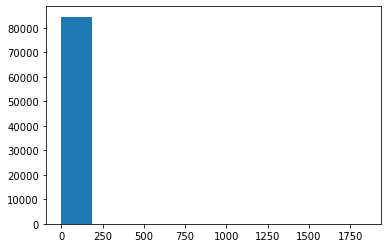

In [68]:
outlier(df.RESIDENTIAL_UNITS)

In [69]:
df[df.RESIDENTIAL_UNITS > 5]

,Index,BOROUGH,NEIGHBOURHOOD,BUILDING_CLASS_CATEGORY,TAX_CLASS_AT_PRESENT,BLOCK,LOT,BUILDING_CLASS_AT_PRESENT,ADDRESS,APPARTMENT_NUMBER,...,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,TOTAL_UNITS,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,YEAR_BUILT,TAX_CLASS_AT_TIME_OF_SALE,BUILDING_CLASS_AT_TIME_OF_SALE,SALE_PRICE,SALE_DATE
1,2,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,5,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
5,6,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,405,16,C4,516 EAST 12TH STREET,,...,20,0,20,2581,9730,1900,2,C4,-,2017-07-20 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82288,82289,Staten Island,ROSEBANK,07 RENTALS - WALKUP APARTMENTS,2,2972,70,C7,162 ST MARYS AVENUE,,...,9,2,11,9800,6875,1931,2,C7,1050000,2017-02-15 00:00:00
82868,82869,Staten Island,SOUTH BEACH,07 RENTALS - WALKUP APARTMENTS,2,3124,102,C1,83 FR CAPODANNO BLVD,,...,19,0,19,7400,4060,1931,2,C1,735000,2017-02-14 00:00:00
82975,82976,Staten Island,STAPLETON,07 RENTALS - WALKUP APARTMENTS,2B,526,6,C1,79 BROAD STREET,,...,8,0,8,6484,8571,1931,2,C1,1600000,2017-03-17 00:00:00
83120,83121,Staten Island,SUNNYSIDE,07 RENTALS - WALKUP APARTMENTS,2B,655,30,C1,17 OSWEGO STREET,,...,8,0,8,8000,5200,1932,2,C1,800000,2016-11-01 00:00:00


In [70]:
# Commertial Units

In [71]:
df.COMMERCIAL_UNITS.value_counts()

0       79429
1        3558
2         817
3         259
4         137
5          74
6          70
7          31
8          26
9          20
10         17
12         12
15         11
11         10
17          6
14          6
254         4
13          4
35          4
20          4
19          3
42          3
22          3
18          3
422         2
436         2
26          2
25          2
16          2
126         2
73          1
67          1
318         1
147         1
2261        1
62          1
59          1
184         1
56          1
55          1
52          1
51          1
49          1
172         1
38          1
34          1
32          1
31          1
30          1
28          1
91          1
27          1
24          1
21          1
23          1
Name: COMMERCIAL_UNITS, dtype: int64

In [72]:
# 2261 too high could be outlier

0.0 0.0


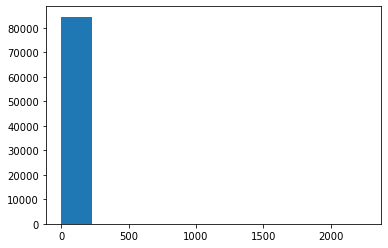

In [73]:
outlier(df.COMMERCIAL_UNITS)

In [74]:
sum= df["COMMERCIAL_UNITS"]+df["RESIDENTIAL_UNITS"]
df["test"]=sum

In [75]:
(df["TOTAL_UNITS"]).equals(df["test"])

False

In [76]:
c=0
a= df["TOTAL_UNITS"]- df["test"]
for i in a:
    if (i!=0):
        c=c+1
c

2650

In [77]:
# Records where it does not match

In [78]:
# Land Square Feet 

In [79]:
df.LAND_SQUARE_FEET.value_counts()

 -       26252
0        10326
2000      3919
2500      3470
4000      3044
         ...  
4101         1
34915        1
15352        1
953          1
3182         1
Name: LAND_SQUARE_FEET, Length: 6062, dtype: int64

In [80]:
df.LAND_SQUARE_FEET.nunique()

6062

In [81]:
# Can remove "-" and "0"

In [82]:
# Gross square feet

In [83]:
df.GROSS_SQUARE_FEET.value_counts()

 -      27612
0       11417
2400      386
1800      361
2000      359
        ...  
4364        1
2931        1
889         1
4293        1
4231        1
Name: GROSS_SQUARE_FEET, Length: 5691, dtype: int64

In [84]:
df.GROSS_SQUARE_FEET.nunique()

5691

In [85]:
# Can remove "-" and "0"

In [86]:
# Year Built

In [87]:
df.YEAR_BUILT.describe()

count    84548.000000
mean      1789.322976
std        537.344993
min          0.000000
25%       1920.000000
50%       1940.000000
75%       1965.000000
max       2017.000000
Name: YEAR_BUILT, dtype: float64

In [88]:
df[df.YEAR_BUILT < 1900].YEAR_BUILT.unique()

array([   0, 1899, 1850, 1864, 1889, 1898, 1875, 1111, 1890, 1895, 1870,
       1840, 1851, 1880, 1846, 1896, 1888, 1892, 1894, 1891, 1800, 1826,
       1881, 1883, 1847, 1829, 1844, 1835, 1852, 1856, 1854, 1832, 1845,
       1849, 1855, 1871, 1893, 1865, 1882, 1680], dtype=int64)

In [89]:
# 0 and 1111 are wrong

In [90]:
for a in df["YEAR_BUILT"]:
    if(a%1!=0):
        print("not integer")

In [91]:
# TAX CLASS AT TIME OF SALE

In [92]:
df.TAX_CLASS_AT_TIME_OF_SALE.value_counts()

1    41533
2    36726
4     6285
3        4
Name: TAX_CLASS_AT_TIME_OF_SALE, dtype: int64

In [93]:
# CLASS AT TIME OF SALE

In [94]:
df.BUILDING_CLASS_AT_TIME_OF_SALE.value_counts()

R4    12989
D4    12666
A1     6751
A5     5671
B2     4918
      ...  
P7        1
K8        1
Y3        1
I3        1
Y1        1
Name: BUILDING_CLASS_AT_TIME_OF_SALE, Length: 166, dtype: int64

In [95]:
df[df.BUILDING_CLASS_AT_TIME_OF_SALE == 0]

,Index,BOROUGH,NEIGHBOURHOOD,BUILDING_CLASS_CATEGORY,TAX_CLASS_AT_PRESENT,BLOCK,LOT,BUILDING_CLASS_AT_PRESENT,ADDRESS,APPARTMENT_NUMBER,...,COMMERCIAL_UNITS,TOTAL_UNITS,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,YEAR_BUILT,TAX_CLASS_AT_TIME_OF_SALE,BUILDING_CLASS_AT_TIME_OF_SALE,SALE_PRICE,SALE_DATE,test


In [96]:
df[df.BUILDING_CLASS_AT_TIME_OF_SALE == " "]

,Index,BOROUGH,NEIGHBOURHOOD,BUILDING_CLASS_CATEGORY,TAX_CLASS_AT_PRESENT,BLOCK,LOT,BUILDING_CLASS_AT_PRESENT,ADDRESS,APPARTMENT_NUMBER,...,COMMERCIAL_UNITS,TOTAL_UNITS,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,YEAR_BUILT,TAX_CLASS_AT_TIME_OF_SALE,BUILDING_CLASS_AT_TIME_OF_SALE,SALE_PRICE,SALE_DATE,test


In [97]:
# Sale Price

In [98]:
df.SALE_PRICE.describe()

count     84548
unique    10008
top         -  
freq      14561
Name: SALE_PRICE, dtype: object

In [99]:
df.SALE_PRICE.value_counts()

 -          14561
0           10228
10            766
450000        427
550000        416
            ...  
881412          1
179500          1
631579          1
13226118        1
2260672         1
Name: SALE_PRICE, Length: 10008, dtype: int64

In [100]:
df=df[df.SALE_PRICE != ' -  ']

In [101]:
df=df[df.SALE_PRICE != 0]

In [102]:
df.SALE_PRICE.value_counts()

0           10228
10            766
450000        427
550000        416
650000        414
            ...  
267700          1
521500          1
259883          1
13226118        1
2260672         1
Name: SALE_PRICE, Length: 10007, dtype: int64

In [103]:
# The records with values 0 and 10 must be incorrect

In [104]:
# SALE DATE

In [105]:
df['SALE_DATE'].value_counts()

2017-06-29 00:00:00    471
2016-12-22 00:00:00    467
2016-10-06 00:00:00    439
2016-09-22 00:00:00    439
2017-06-30 00:00:00    437
                      ... 
2017-08-06 00:00:00      1
2017-04-23 00:00:00      1
2017-07-16 00:00:00      1
2016-12-03 00:00:00      1
2017-08-13 00:00:00      1
Name: SALE_DATE, Length: 362, dtype: int64

In [106]:
df['SALE_DATE'] = pd.to_datetime(df['SALE_DATE'])

In [107]:
df['SALE_DATE']

0       2017-07-19
3       2016-09-23
4       2016-11-17
6       2016-09-23
9       2016-11-07
           ...    
84543   2016-11-28
84544   2017-04-21
84545   2017-07-05
84546   2016-12-21
84547   2016-10-27
Name: SALE_DATE, Length: 69987, dtype: datetime64[ns]

In [108]:
df.shape

(69987, 22)

In [109]:
df.to_csv("Nyc cleaned.csv")